In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.utils import np_utils
from sklearn.metrics import classification_report
print(tf.__version__)

Using TensorFlow backend.


1.14.0-rc1


In [3]:
#download data and assign labels for train and test set
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [5]:
#print train and test size
print('Train shape:', train_images.shape)
print('Train length:', len(train_labels))
print('Train labels:', train_labels)
print('Test shape:', test_images.shape)
print('Test length:', test_labels.shape)

Train shape: (60000, 28, 28)
Train length: 60000
Train labels: [5 0 4 ... 5 6 8]
Test shape: (10000, 28, 28)
Test length: (10000,)


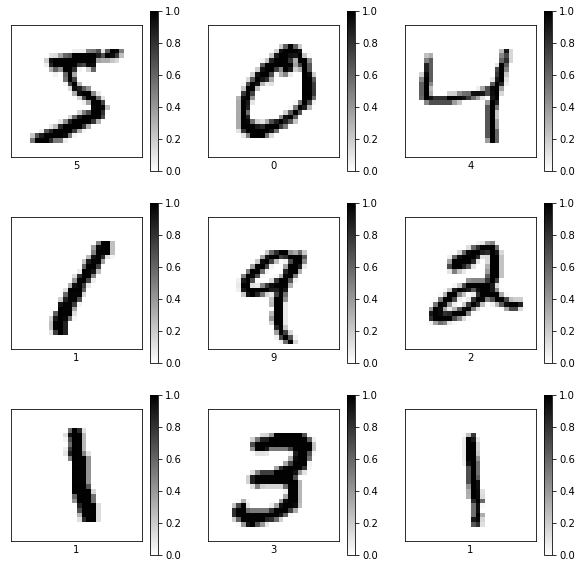

In [6]:
#normalize data
train_images = train_images/255.0
test_images = test_images/255.0
#plot image
plt.figure(figsize = (10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

In [7]:
#prepare data for convNet
trainY = np_utils.to_categorical(train_labels, 10)
testY = np_utils.to_categorical(test_labels, 10)
trainX = train_images
testX = test_images
if trainX.ndim<4:
  trainX = np.expand_dims(train_images, axis = 3)
  testX = np.expand_dims(test_images, axis = 3)
print(trainX.shape)
print(trainY.shape)

(60000, 28, 28, 1)
(60000, 10)


In [8]:
def build(width, height, depth, classes):
    # initialize the model along with the input shape to be
    # "channels last" and the channels dimension itself
    model = Sequential()
    inputShape = (height, width, depth)
 
    # first CONV => RELU => POOL layer set
    model.add(Conv2D(32, (5, 5), padding="same",input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
#    model.add(Dropout(0.25))

    # second CONV => RELU => POOL layer set
    model.add(Conv2D(64, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
#    model.add(Dropout(0.25))

    # third CONV => RELU => POOL layer set
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
#    model.add(Dropout(0.25))

    # first set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    # second set of FC => RELU layers
    model.add(Dense(120))
    model.add(Activation("relu"))
    #third set of FC => RELU layers
    model.add(BatchNormalization())
    model.add(Dense(30))
    model.add(Activation("relu"))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    # return the constructed network architecture
    return model
  
  
# build model, initialize the optimizer and model
model = build(width=28, height=28, depth=1, classes=10)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])  
#summary about model  
model.summary()  

W0618 16:22:58.762230 140116561917824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 16:22:58.782269 140116561917824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 16:22:58.784841 140116561917824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 16:22:58.811095 140116561917824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0618 16:22:58.811864 1401165619

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
__________

In [9]:
N = 3
H= model.fit(trainX, trainY, epochs = N, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 19s 319us/step - loss: 0.0172 - acc: 0.9942 - val_loss: 0.0134 - val_acc: 0.9952
Epoch 2/3
60000/60000 [==============================] - 16s 274us/step - loss: 0.0084 - acc: 0.9973 - val_loss: 0.0070 - val_acc: 0.9977
Epoch 3/3
60000/60000 [==============================] - 16s 273us/step - loss: 0.0065 - acc: 0.9980 - val_loss: 0.0092 - val_acc: 0.9974


In [10]:
train_loss, train_acc = model.evaluate(trainX, trainY)
print('Train accuracy:', train_acc)
test_loss, test_acc = model.evaluate(testX, testY)
print('Test accuracy:', test_acc)

60000/60000 [==============================] - 5s 79us/step
Train accuracy: 0.9978933289527893
10000/10000 [==============================] - 1s 77us/step
Test accuracy: 0.997419995880127


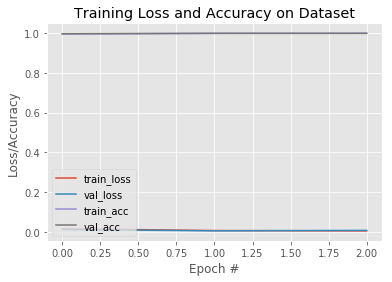

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")